In [1]:
#Import Libraries and Churn dataset
import pandas as pd
import numpy as np 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

churnclean = pd.read_csv('churn_clean.csv')

In [2]:
#Check for Missing Data
churnclean.isna().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [3]:
#Summary Statistics of Categorical Variables
churnclean[['Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']].describe()

,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport
count,10000,10000,10000,10000,10000
unique,2,2,2,2,2
top,No,No,No,No,No
freq,5392,6424,5494,5614,6250


In [4]:
#Summary Statistics of Continuous Variables
churnclean[['Bandwidth_GB_Year','MonthlyCharge']].describe()


,Bandwidth_GB_Year,MonthlyCharge
count,10000.000000,10000.000000
mean,3392.341550,172.624816
std,2185.294852,42.943094
min,155.506715,79.978860
25%,1236.470827,139.979239
50%,3279.536903,167.484700
75%,5586.141370,200.734725
max,7158.981530,290.160419


In [5]:
#Feature Scaling - Continuous Variable 
#X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 40)
scaler = StandardScaler()
churnclean[['Bandwidth_GB_Year']] = scaler.fit_transform(churnclean[['Bandwidth_GB_Year']])


#X_train[['Bandwidth_GB_Year']] = scaler.fit_transform(X_train[['Bandwidth_GB_Year']])
#X_test[['Bandwidth_GB_Year']] = scaler.fit_transform(X_test[['Bandwidth_GB_Year']])


In [6]:
#Dummy Variables of Categorical Variables
ServicesPrefix = ['Gender','Churn','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','Port_modem','Tablet','InternetService','Phone','StreamingTV','StreamingMovies','PaperlessBilling','Contract','TechSupport','Techie','PaymentMethod']
#Remove 1 dummy each for each column to prevent Dummy Trap
Churndummies = pd.get_dummies(churnclean[ServicesPrefix], prefix = ServicesPrefix)
DummyChurn= pd.concat([churnclean,Churndummies], axis = 'columns')
ChurnFinal = DummyChurn.drop(['Gender','Gender_Nonbinary','Churn','Churn_No','Multiple','Multiple_No','OnlineSecurity','OnlineSecurity_No','OnlineBackup','OnlineBackup_No','DeviceProtection','DeviceProtection_No','Port_modem','Port_modem_No','Tablet','Tablet_No','InternetService','InternetService_None','Phone','Phone_No','StreamingTV','StreamingTV_No','StreamingMovies','StreamingMovies_No','PaperlessBilling','PaperlessBilling_No','Contract','Contract_Month-to-month','TechSupport','TechSupport_No','Techie','Techie_No','Port_modem','PaymentMethod','PaymentMethod_Mailed Check'],axis = 'columns')
ChurnFinal

#Check for Outliers - Independent Variables
modelchurnx = ChurnFinal[['Multiple_Yes','Bandwidth_GB_Year','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes']]
modelchurnx.boxplot()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Contract_One year,Contract_Two Year,TechSupport_Yes,Techie_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,0,1,1,1,0,0,0,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,1,1,1,0,0,0,1,1,0,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,0,1,1,0,1,0,1,0,1,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,1,0,1,0,1,0,1,0,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,0,0,0,0,0,0,0,0,0,1
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,1,0,0,0,1,0,0,0,0,1
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,0,0,1,0,0,0,0,1,0,0
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,1,1,1,0,1,1,0,0,1,0


<AxesSubplot:>

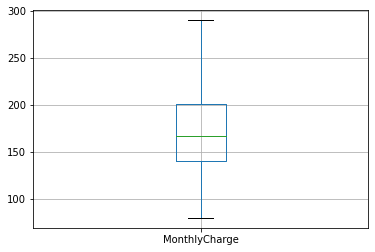

In [8]:
#Check for Outliers - Dependent Variable
MonthlyChargeOutliers = churnclean[['MonthlyCharge']]
MonthlyChargeOutliers.boxplot()

array([[<AxesSubplot:title={'center':'TechSupport_Yes'}>]], dtype=object)

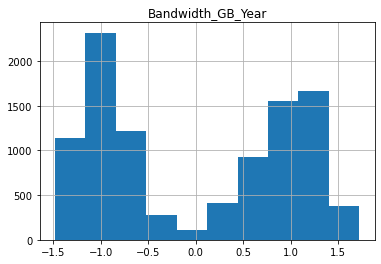

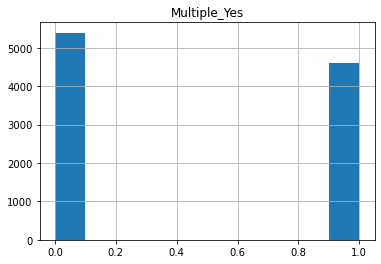

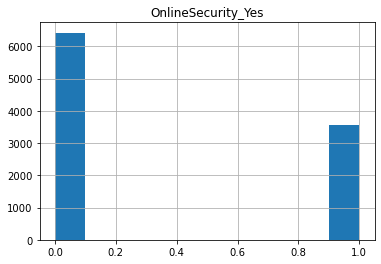

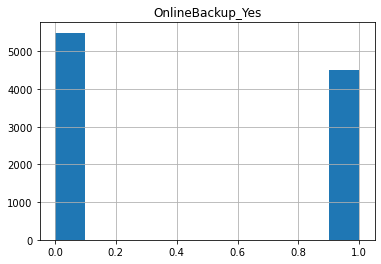

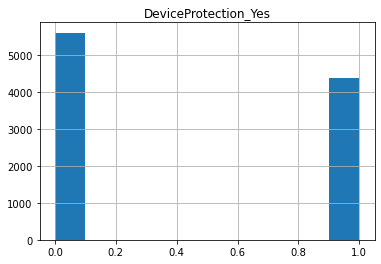

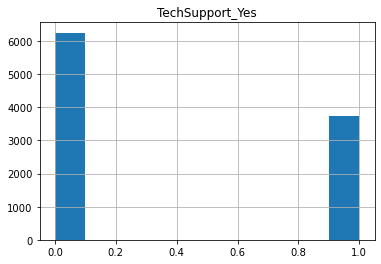

In [9]:
#Identify Distribution of Continuous Variables - Univariate
ChurnFinal.hist(column='Bandwidth_GB_Year') #Spread
ChurnFinal.hist(column='Multiple_Yes')
ChurnFinal.hist(column='OnlineSecurity_Yes')
ChurnFinal.hist(column='OnlineBackup_Yes')
ChurnFinal.hist(column='DeviceProtection_Yes')
ChurnFinal.hist(column='TechSupport_Yes')

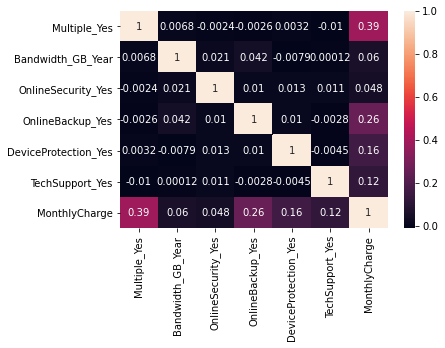

In [10]:
#Identify Distribution of Continuous Variables - Bivariate
import seaborn as sns
churncleanbivarate = ChurnFinal[['Multiple_Yes','Bandwidth_GB_Year','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','MonthlyCharge']]
sns.heatmap(churncleanbivarate.corr(), annot = True)
plt.show()

In [11]:
#Provide a copy of the prepared data set
ChurnFinal.to_csv('ChurnCleanD208.csv')


In [12]:
#Part IV : Model Comparison and Analysis
#Model building with Statsmodels - Initial
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = ChurnFinal[['Multiple_Yes','Bandwidth_GB_Year','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes']]
y = ChurnFinal[['MonthlyCharge']]
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc.astype(float))
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     591.0
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:11:02   Log-Likelihood:                -50269.
No. Observations:               10000   AIC:                         1.006e+05
Df Residuals:                    9993   BIC:                         1.006e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  135.7199      0.790    171.757      0.000     134.171     137.269
Multiple_Yes            33.3564      0.740     45.050      0.000      31.905      34.808
Bandwidth_GB_Year        2.0358      0.369      5.510      0.000       1.312       2.760
OnlineSecurity_Yes       3.7297      0.770      4.842      0.000       2.220       5.240
OnlineBackup_Yes        22.1615      0.742     29.850      0.000      20.706      23.617
DeviceProtection_Yes    13.7875      0.744     18.535      0.000      12.329      15.246
TechSupport_Yes         11.1131      0.762     14.577      0.000       9.619      12.608
==============================================================================
Omnibus:                      924.533   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.916
Skew:                           0.599   Prob(JB):                    1.46e-168
Kurtosis:                       2.352   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

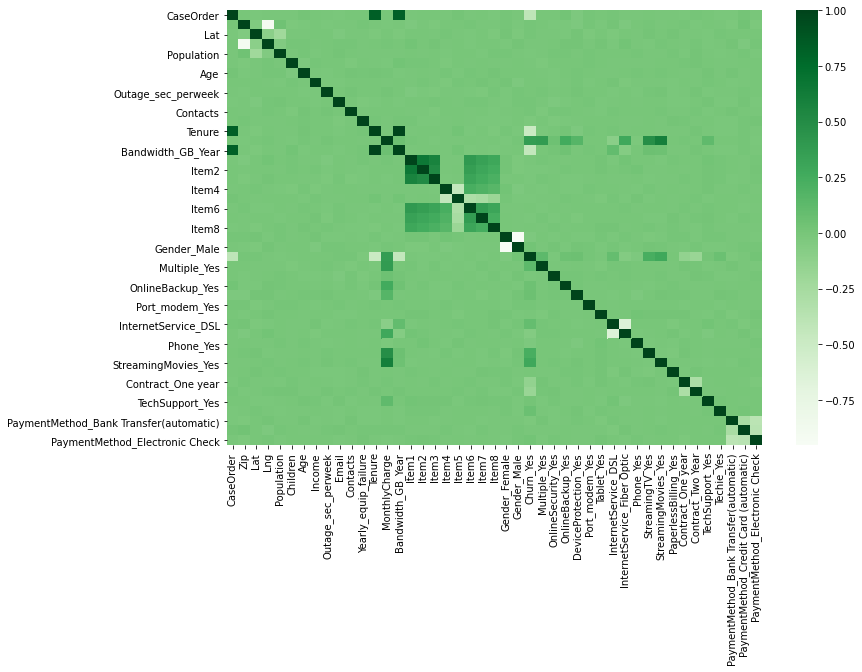

In [13]:
corr = ChurnFinal.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = "Greens")

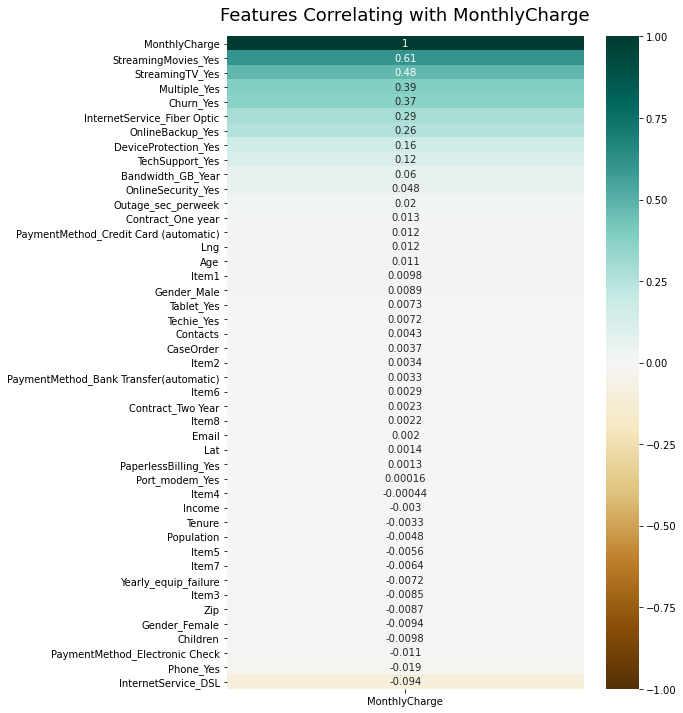

In [14]:
#HeatMap thats features correlation between the dependent variable : MonthlyCharge
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ChurnFinal.corr()[['MonthlyCharge']].sort_values(by='MonthlyCharge', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with MonthlyCharge', fontdict={'fontsize':18}, pad=16);

In [16]:
#Part IV : Model Comparison and Analysis - Reduced Model
#Model building with Statsmodels - Reduced
import statsmodels.api as sm
import statsmodels.formula.api as smf
Xreduced = ChurnFinal[['Bandwidth_GB_Year','StreamingMovies_Yes','StreamingTV_Yes','InternetService_Fiber Optic','Multiple_Yes','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes']]
yreduced = ChurnFinal[['MonthlyCharge']]
Xcreduced = sm.add_constant(Xreduced)
linear_regressionreduced = sm.OLS(yreduced,Xcreduced.astype(float))
fitted_modelreduced = linear_regressionreduced.fit()
fitted_modelreduced.summary()
mse = fitted_modelreduced.mse_resid
rse = np.sqrt(mse)
print("The reduced initial model has a rse value of : " + str(rse))

The reduced initial model has a rse value of : 9.95109442039031


In [18]:
fitted_modelreduced.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.958e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:12:39   Log-Likelihood:                -37161.
No. Observations:               10000   AIC:                         7.434e+04
Df Residuals:                    9990   BIC:                         7.441e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          78.8871      0.269    293.517      0.000      78.360      79.414
Bandwidth_GB_Year               0.4610      0.100      4.606      0.000       0.265       0.657
StreamingMovies_Yes            52.2966      0.199    262.316      0.000      51.906      52.687
StreamingTV_Yes                42.1290      0.199    211.313      0.000      41.738      42.520
InternetService_Fiber Optic    24.7995      0.201    123.424      0.000      24.406      25.193
Multiple_Yes                   32.7919      0.200    164.234      0.000      32.401      33.183
OnlineSecurity_Yes              2.7807      0.208     13.385      0.000       2.373       3.188
OnlineBackup_Yes               22.5365      0.200    112.565      0.000      22.144      22.929
DeviceProtection_Yes           12.4646      0.201     62.130      0.000      12.071      12.858
TechSupport_Yes                12.6426      0.206     61.471      0.000      12.239      13.046
==============================================================================
Omnibus:                    33339.141   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.980
Skew:                          -0.050   Prob(JB):                    8.23e-154
Kurtosis:                       1.703   Cond. No.                         5.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

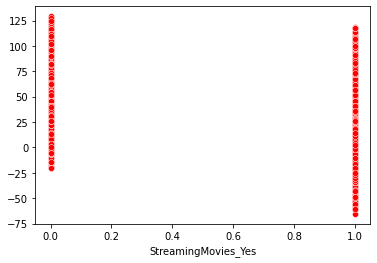

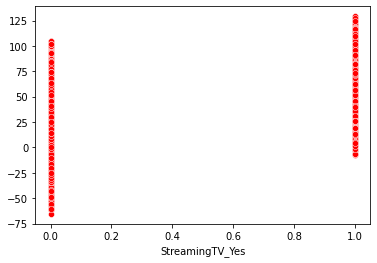

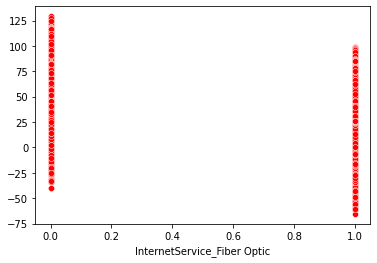

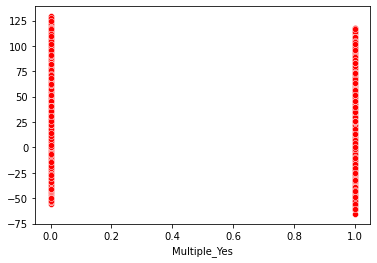

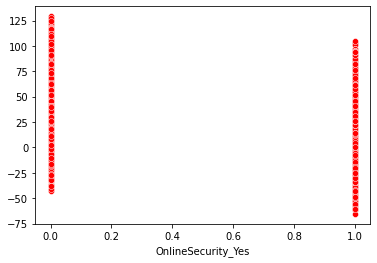

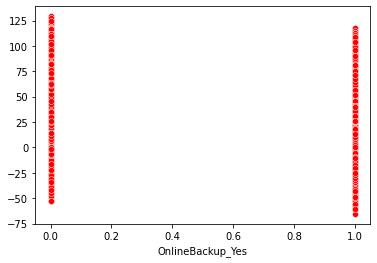

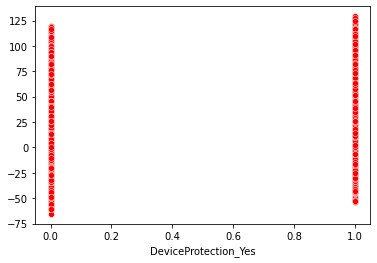

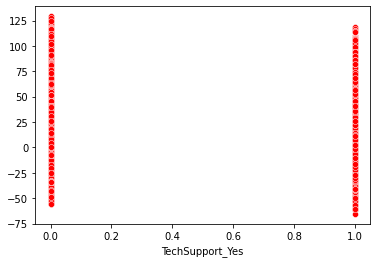

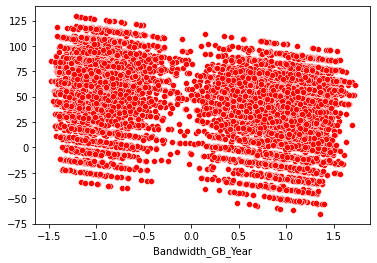

In [17]:
#Residual Plots
churn_df = pd.read_csv('ChurnCleanD208.csv')
churn_df['intercept'] = 1
residuals = churn_df['MonthlyCharge'] - fitted_modelreduced.predict(churn_df[['StreamingMovies_Yes', 'StreamingTV_Yes', 'InternetService_Fiber Optic', 'Multiple_Yes','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','Bandwidth_GB_Year','intercept']])
sns.scatterplot(x=churn_df['StreamingMovies_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['StreamingTV_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['InternetService_Fiber Optic'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['Multiple_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['OnlineSecurity_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['OnlineBackup_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['DeviceProtection_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['TechSupport_Yes'],y=residuals,color='red')
plt.show();
sns.scatterplot(x=churn_df['Bandwidth_GB_Year'],y=residuals,color='red')
plt.show();
